### Sweeft Acceleration  - Data Science
##### Aplicant:  Tornike Gagnidze

geo:
ამოცანა არის მომხმარებლების დაკლასტრება, მინიმალური რაც გევალებათ არის მონაცემების ანალიზი და დამუშავება.

შეზღუდული არ ხართ ტექნოლოგიებში, მთავარია დავინახოთ მონაცემებთან მუშაობის დამოკიდებულება, აღქმის უნარი და კრეატიული ხედვა. მაგალითისთვის შეგიძლიათ გააკეთოთ ატრიბუტების გამოკვლევა, გამოიყენოთ სხვადასხვა ტიპის ვიზუალიზაციები და დაგვანახოთ რა პრობლემები აქვს მონაცემებს და როგორ შეიძლება გადაიჭრას ისინი.

ბონუსი: გააკეთეთ მომხლარებლების დაკლასტრება


###  $0.$ Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

### $1.$ Load Data

In [2]:
df = pd.read_csv(r'Data Science Task customer_analysis.csv', sep='\t')  
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### $2.$ explore data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
#Check for any missing or null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
# >> there are 24 missing values in 'Income'. rest of the data looks good
df = df.dropna() #  Drop Rows with NaN Values

In [6]:
# check for duplicates
print(df.duplicated().sum())

0


In [7]:
# convert the date column to datetime type
# >> df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [8]:
# calculate the age of each customer
df['Age'] = 2023 - df['Year_Birth']
# remove Year_Birth column
df.drop(['Year_Birth','Dt_Customer'], axis=1, inplace=True)

 'Z_CostContact' and 'Z_Revenue' have the same value in all the rows and they will not contribute in the model,  
 So I remove them from df.

In [9]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

In [10]:
# plots all pairs from df. its good to get general overview of the data
# I comment since it consume a lot of time
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><
#sns.pairplot(df)  
#plt.show()

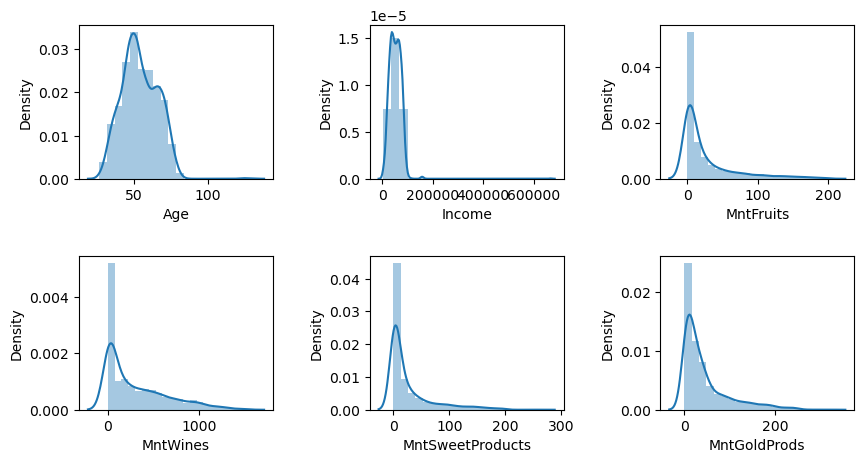

In [11]:
plt.figure(1 , figsize = (10 , 5))
n = 0 
for x in ['Age' , 'Income' , 'MntFruits', 'MntWines', 'MntSweetProducts','MntGoldProds']:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
plt.show()

In [12]:
# Income containes some anomalies
df['Income'].skew() # = 6.763487372811 , it is high positive skewness

6.7634873728111184

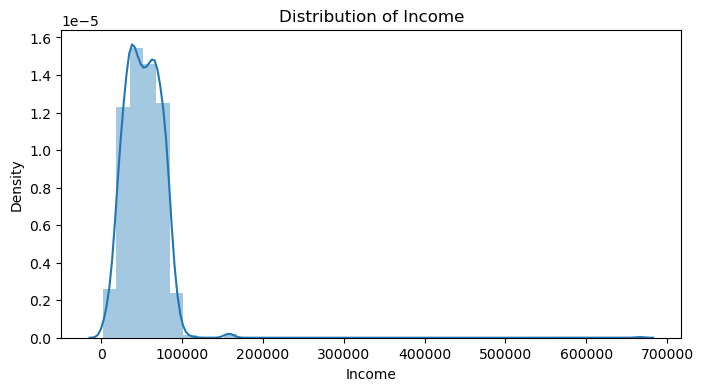

In [13]:
plt.figure(1 , figsize = (8 , 4))
plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
sns.distplot(df['Income'] , bins = 40)
plt.title('Distribution of Income')
plt.show() 

In [14]:
income = df['Income'].values
income.sort()
desc = income[::-1]
desc 

# 666666 is extremely high; either there is a single 'super rich' user, or there is some mistake. 
# I will remove this row since it affects the statistical analysis.

array([666666., 162397., 160803., ...,   3502.,   2447.,   1730.])

In [15]:
# remove the row where Income is too high
max_income = 600000  # set the threshold for income (max is 666666)
df = df[df['Income'] <= max_income]

In [16]:
# I cut out 1 high Income and skewness became much lower
df['Income'].skew() # = 0.204389883 , lower  positive skewness

0.3473496759140282

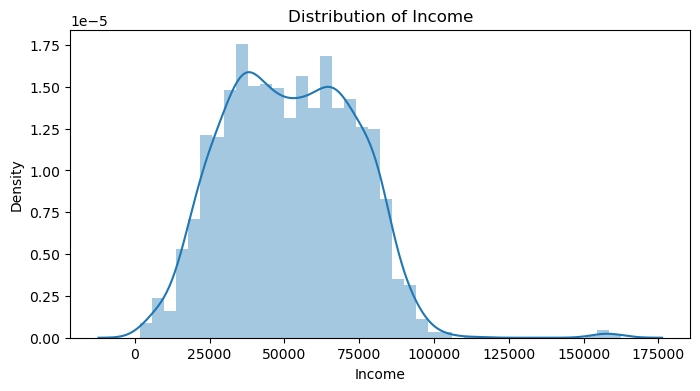

In [17]:
plt.figure(1 , figsize = (8 , 4))
plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
sns.distplot(df['Income'] , bins = 40)
plt.title('Distribution of Income')
plt.show() 

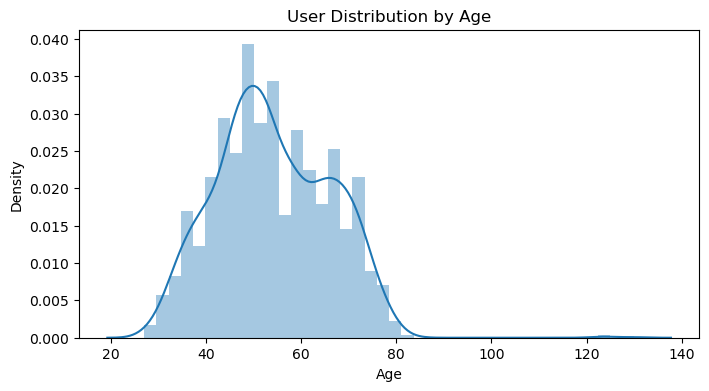

In [18]:
plt.figure(1 , figsize = (8 , 4))
plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
sns.distplot(df['Age'] , bins = 40)
plt.title('User Distribution by Age')
plt.show() 

In [19]:
income = df['Age'].values
income.sort()
desc = income[::-1]
desc[:5]  #  there are users with age of 130, 124, 123.. can be error in dataset

array([130, 124, 123,  83,  82], dtype=int64)

In [20]:
# remove the row where Age is > 120
max_age = 120  # set the threshold for income 
df = df[df['Age'] <= max_age]

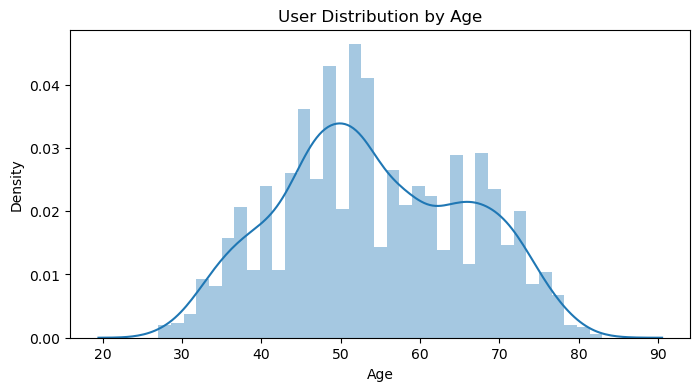

In [21]:
plt.figure(1 , figsize = (8 , 4))
plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
sns.distplot(df['Age'] , bins = 35)
plt.title('User Distribution by Age')
plt.show() 

Vizualize some other data features

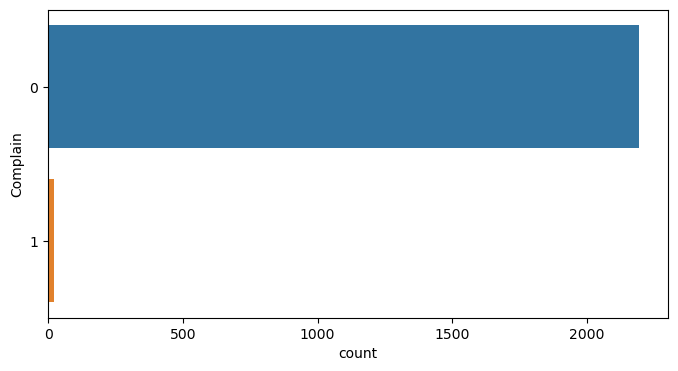

21

In [22]:
plt.figure(1 , figsize = (8 , 4))
sns.countplot(y = 'Complain' , data = df)
plt.show()

sum(df['Complain'])  # =21, in total 21 complain out of 2215 (<1%) 

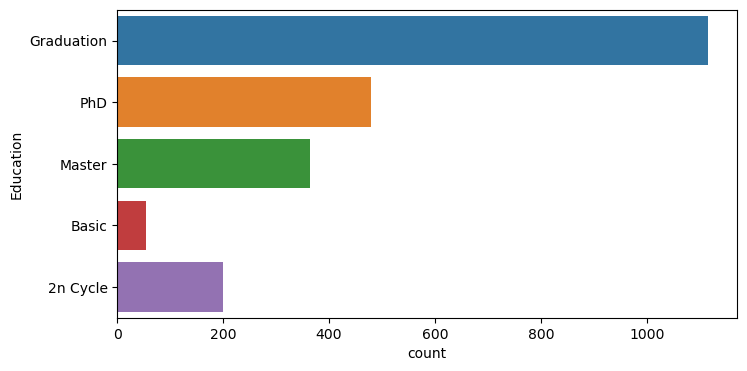

In [23]:
plt.figure(1 , figsize = (8, 4))
sns.countplot(y = 'Education' , data = df)
plt.show()

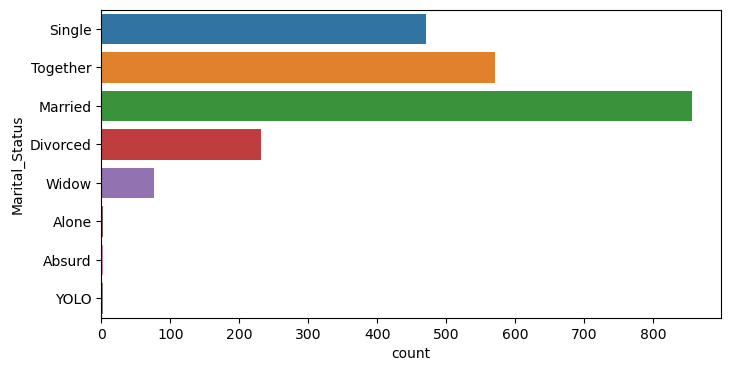

In [24]:
plt.figure(1 , figsize = (8 , 4))
sns.countplot(y = 'Marital_Status' , data = df)
plt.show()

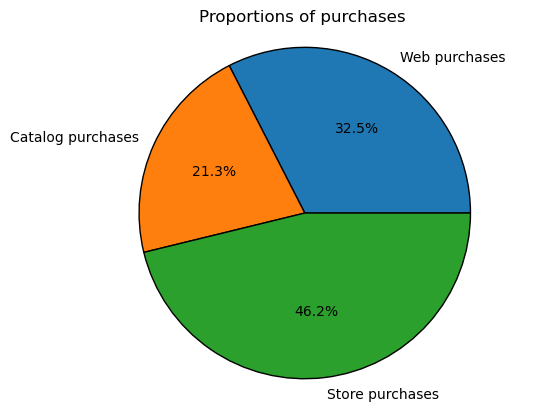

In [25]:
# total count of each type of purchase 
total_purchases = df['NumWebPurchases'].sum() + df['NumCatalogPurchases'].sum() + df['NumStorePurchases'].sum()

# proportions of each type of purchase 
web_purchase_prop = df['NumWebPurchases'].sum() / total_purchases
catalog_purchase_prop = df['NumCatalogPurchases'].sum() / total_purchases
store_purchase_prop = df['NumStorePurchases'].sum() / total_purchases


# list of labels and proportions
labels = ['Web purchases', 'Catalog purchases', 'Store purchases']
proportions = [web_purchase_prop, catalog_purchase_prop, store_purchase_prop]

# pie chart
plt.pie(proportions, labels=labels, autopct='%1.1f%%',
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Proportions of purchases')
plt.axis('equal')
plt.show()

Plot the dependence of some numeric values on each other to get a general overview.

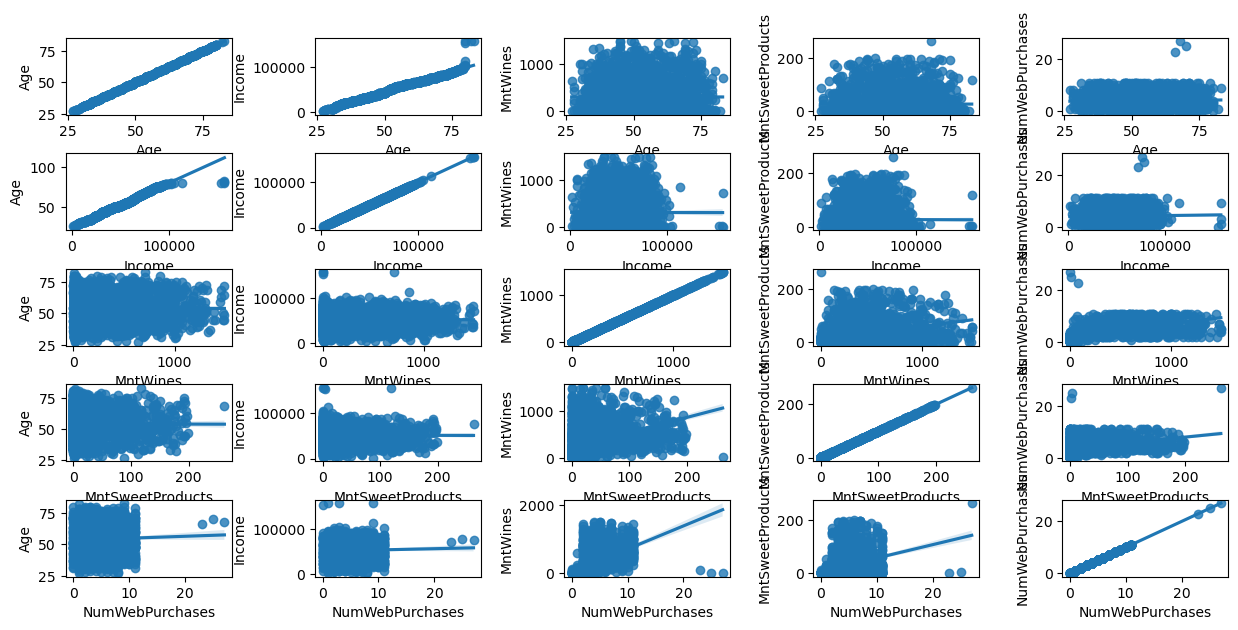

In [26]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in [    'Age' , 'Income' , 'MntWines', 'MntSweetProducts','NumWebPurchases']:
    for y in ['Age' , 'Income' , 'MntWines', 'MntSweetProducts','NumWebPurchases']:
        n += 1
        plt.subplot(5, 5, n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

Income gradually increases with age. 
Below I plot Age vs Income:

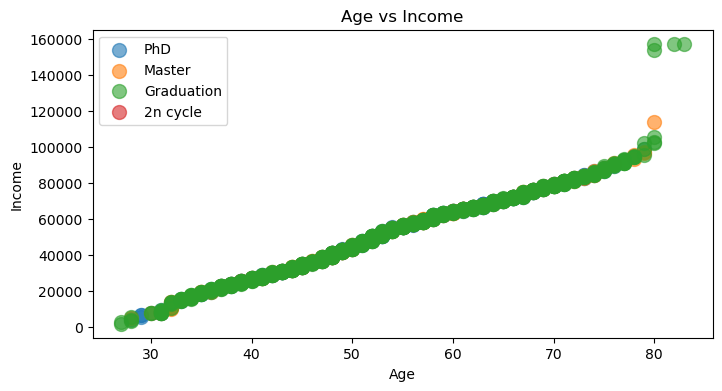

In [27]:
plt.figure(1 , figsize = (8 , 4))
for Education in ['PhD','Master','Graduation', '2n cycle']:
    plt.scatter(x = 'Age' , y = 'Income' , data = df[df['Education'] == Education] ,
                s = 100 , alpha = 0.6 , label = Education)
plt.xlabel('Age'), plt.ylabel('Income') 
plt.title('Age vs Income')
plt.legend()
plt.show()

On this plot, we cannot see any difference in income for different education levels. To examine this in more detail, I have plotted the average income for each education level below:

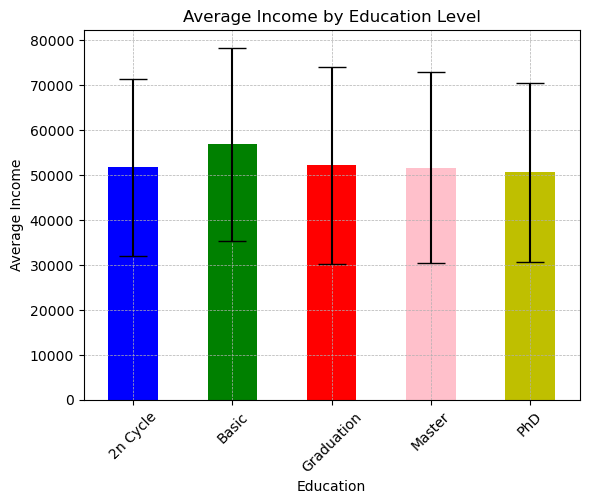

In [28]:
# average Income of users with different Education level

# Select only the 'Education' and 'Income' columns
subset = df[['Education', 'Income']]

# Group the data by education level and calculate the mean income for each group
grouped = subset.groupby('Education').agg(['mean', 'std'])
grouped.columns = grouped.columns.droplevel()

# Create a bar chart of the mean income values
grouped.plot(kind='bar', y='mean', yerr='std', legend=False,
            color=['blue', 'green', 'red', 'pink','y'], ecolor='black', capsize=10)

plt.figure(1 , figsize = (8 , 4))
plt.title('Average Income by Education Level')
plt.ylabel('Average Income')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xticks(rotation=45)
plt.legend([]).remove()
plt.show()


The error bars represent the standard deviation of the mean income. 
As we can see, there is no significant difference in income between different formal education levels. 

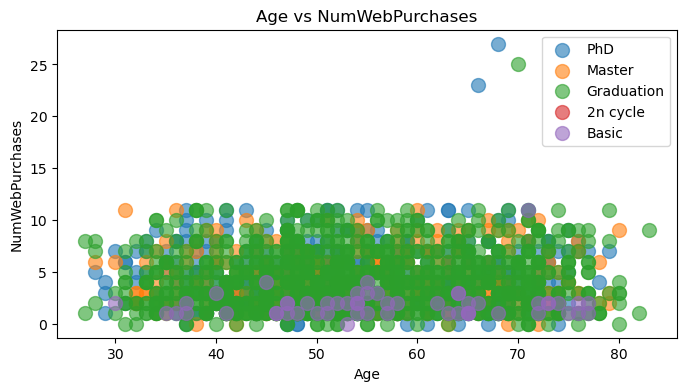

In [29]:
plt.figure(1 , figsize = (8 , 4))
for Education in ['PhD','Master','Graduation', '2n cycle', 'Basic']:
    plt.scatter(x = 'Age' , y = 'NumWebPurchases' , data = df[df['Education'] == Education] ,
                s = 100 , alpha = 0.6 , label = Education)    
plt.xlabel('Age'), plt.ylabel('NumWebPurchases') 
plt.title('Age vs NumWebPurchases')
plt.legend()
plt.show()

Surprise: the number of online purchases does not decrease with age

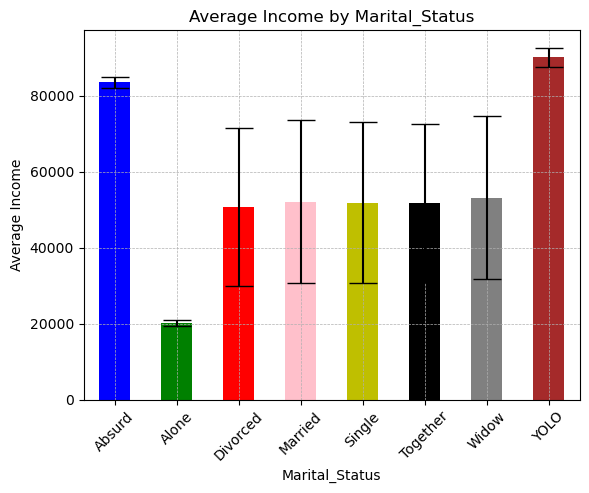

In [30]:
# average Income of users with different martial status
# Select only the 'Marital_Status' and 'Income' columns
subset = df[['Marital_Status', 'Income']]

# Group the data by Marital_Status and calculate the mean income for each group
grouped = subset.groupby('Marital_Status').agg(['mean', 'std'])
grouped.columns = grouped.columns.droplevel()

# Create a bar chart of the mean income values
grouped.plot(kind='bar', y='mean', yerr='std', legend=False,
            color=['blue', 'green', 'red', 'pink','y', 'black','gray','brown'], ecolor='black', capsize=10)


plt.title('Average Income by Marital_Status')
plt.ylabel('Average Income')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xticks(rotation=45)
plt.legend([]).remove()
plt.show()

The amount  of  <i>'YOLO!'</i>, <i>'Alone'</i>, and <i>'Absurd'</i> is very small, and statistical analysis of these responses can be misleading. 

In other cases, the average incomes are not significantly different.

### $3.$ Clustering

#### $3.1$ Prepare Data for Clustering

I copy original 'df' to new dataFrdame ('cdf') and will do all other changed  on this new one.

In [31]:
#create new dataFrame:
cdf = df

In [32]:
# >>>>1<<< function to calculate the number of days between two dates
def days_since(date_str):
    start_date = datetime.strptime(date_str, '%d-%m-%Y')
    current_date = datetime.today()
    return (current_date - start_date).days

# cdf['Days'] will be new column in cdf, 
#>>> cdf['Days'] = cdf['Dt_Customer'].apply(days_since)


# >>>>2<<< Remove unnecessary columns
#>>> cdf.drop(['ID','Dt_Customer'], axis=1, inplace=True) 
# I assume 'ID'  column may not have a direct impact on clustering.
# 'Dt_Customer' is relpaced by 'Days'

# >>>>3<<<
# Convert categorical variables into numerical variables using one-hot encoding
#create new dataFrame:

cdf = pd.get_dummies(cdf, columns=['Education', 'Marital_Status'])


cdf.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1730.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,0,0
1,2174,2447.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,1,0,0,0
2,4141,3502.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,0,0
3,6182,4023.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,0,0
4,5324,4428.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,1,0,0,0,0


In [33]:
# Normalize the data
scaler = StandardScaler()
cdf_norm = scaler.fit_transform(cdf)
X = scaler.fit_transform(cdf.values)

#### $3.2.$   Determine the optimal number of clusters

for clustering data I used <b>K-means method</b>.

In order to find optimal number of clusters I used <b>'Elbow Method'</b> and <b>'Silhouette Method'</b>

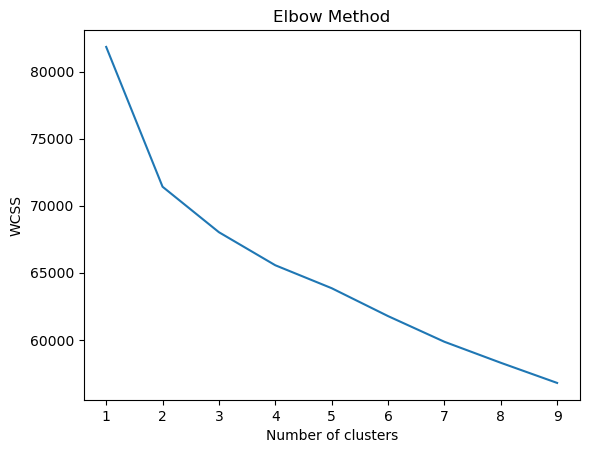

In [34]:
# Determine the optimal number of clusters using the elbow method
wcss = []
# max number of clusters
k = 10
for i in range(1, k):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, k), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The Elbow method suggests that the optimal number of clusters is k = 2. To confirm this, I additionally use the Silhouette method and overlay these two plots on the same graph.

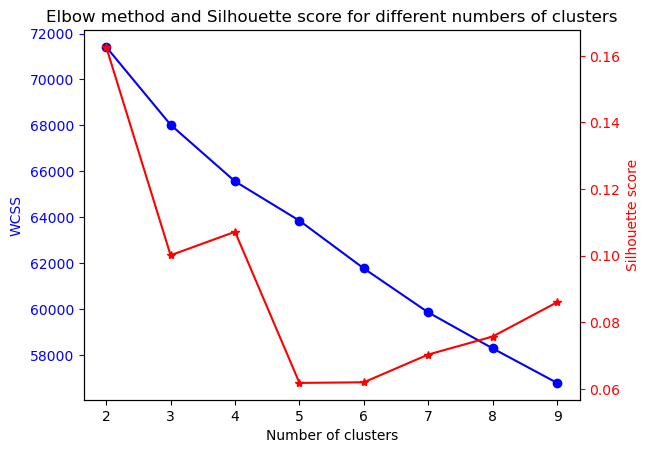

In [35]:
# range of cluster numbers
k_range = range(2, 10)

# Initialize lists to store the evaluation metrics
wcss_scores = []              # Within-cluster sum of squares
silhouette_scores = []


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))


fig, ax1 = plt.subplots()
ax1.plot(k_range, wcss_scores, 'bo-')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(k_range, silhouette_scores, 'r*-')
ax2.set_ylabel('Silhouette score', color='red')
ax2.tick_params('y', colors='red')

plt.title('Elbow method and Silhouette score for different numbers of clusters')
plt.show()

I Check the <b>consistency</b> of the results: run the Elbow method and Silhouette score multiple times to see if you consistently get different results. 
$\Rightarrow$ results are consistent. 

I have selected k=2 clusters for the K-means analysis. The silhouette score increases for larger number of  clusters (k>10), 
but it does not go above the value obtained for k=2.

#### $3.3$ K-means Clustering

In [36]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(cdf_norm)
cdf['Cluster'] = kmeans.labels_

#### $3.4$ Evaluate model

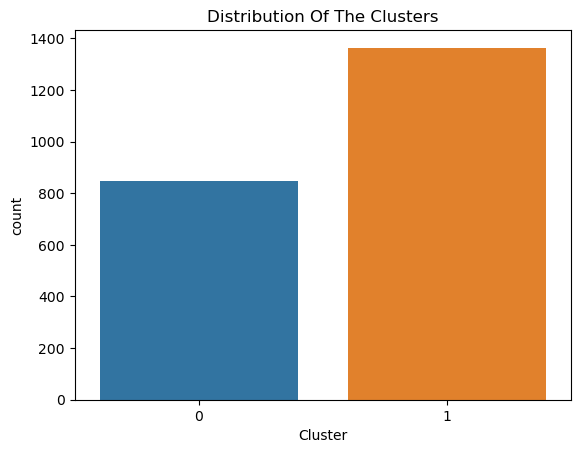

In [37]:
#Plotting countplot of clusters
pl = sns.countplot(x=cdf['Cluster'])
pl.set_title('Distribution Of The Clusters')
plt.show()

Cluster 1 has low count compared to other cluster

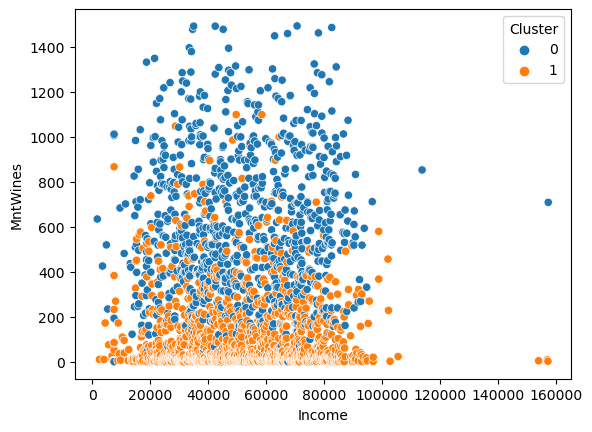

In [38]:
# plot MntWines vs Income for different clusters
sns.scatterplot(x='Income', y='MntWines', data=cdf, hue='Cluster')
plt.show()

In [39]:
cdf['Expenses'] = cdf['MntWines'] + cdf['MntFruits'] + cdf['MntMeatProducts'] + cdf['MntFishProducts'] + cdf['MntSweetProducts'] + df['MntGoldProds']

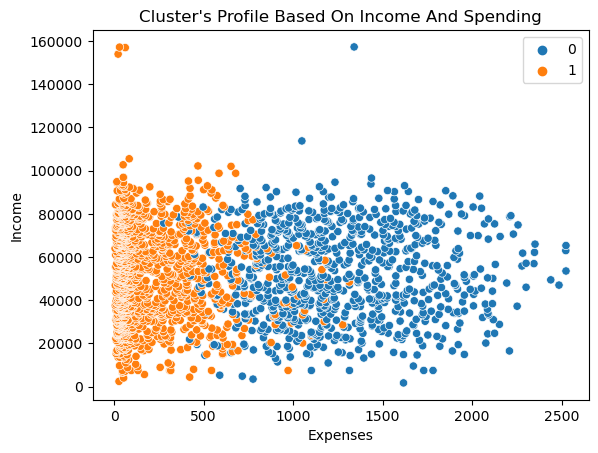

In [40]:
pl = sns.scatterplot(data = cdf,x=cdf["Expenses"], y=cdf["Income"],hue=cdf["Cluster"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Cluster 1 spends less than Cluster 0, and their expenditures do not depend on their income

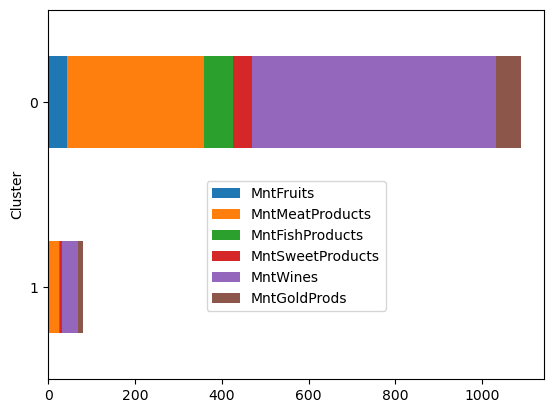

In [41]:
customers = cdf.groupby(['Cluster']).median()
customer0 = pd.DataFrame({'MntFruits': customers.MntFruits,
                    'MntMeatProducts': customers.MntMeatProducts,
                    'MntFishProducts': customers.MntFishProducts,
                    'MntSweetProducts': customers.MntSweetProducts,
                    'MntWines' : customers.MntWines,
                    'MntGoldProds' : customers.MntGoldProds},
                   index=customers.index).sort_values(by=['Cluster'], ascending=False)
customer0.plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(0.5, 0.36), loc='center', borderaxespad=0)
plt.show()

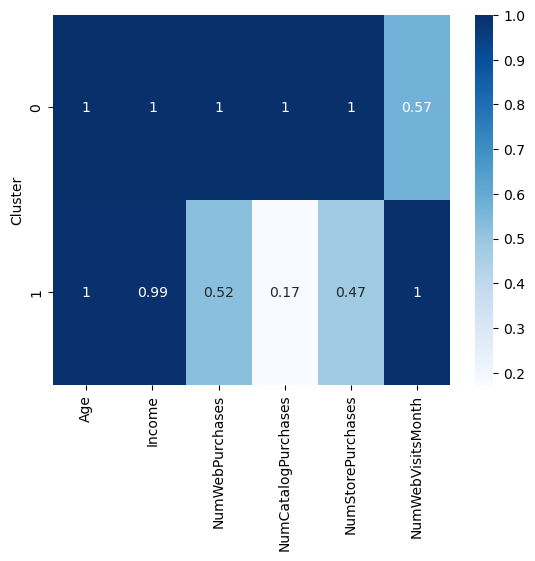

In [42]:
# create a heatmap to visualize the correlation between attributes in each cluster
cluster_attributes = ['Age', 'Income',  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
max_c = np.max(np.abs(cdf.groupby('Cluster')[cluster_attributes].mean()))
sns.heatmap(cdf.groupby('Cluster')[cluster_attributes].mean()/max_c, cmap="Blues", annot=True)
plt.show()

heatmap lpot that visualizes the correlation between different attributes in each cluster. 

The x-axis represents the attributes (Age, Income, NumWebPurchases, etc.) and the y-axis represents the different clusters (Cluster 0, Cluster 1, Cluster 2, Cluster 3).

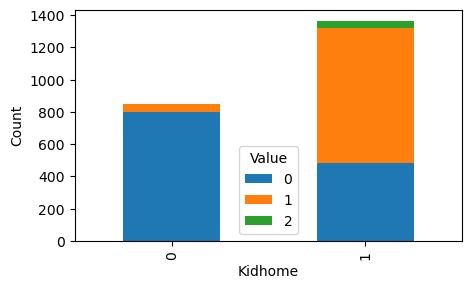

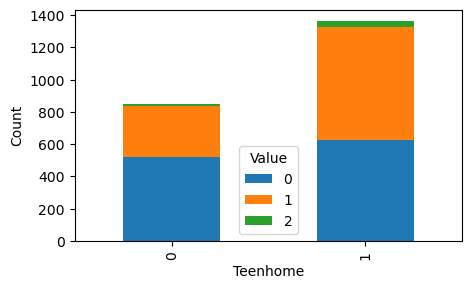

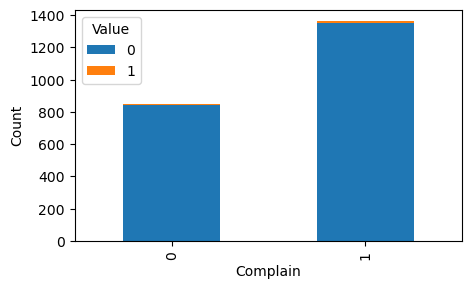

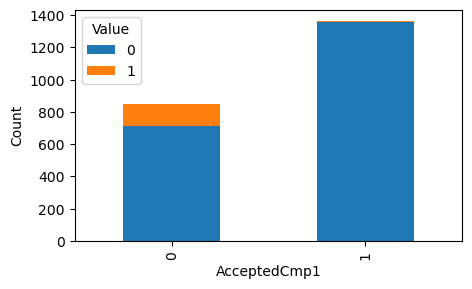

In [43]:
# bar charts to visualize the count of each categorical attribute in each cluster
categorical_attributes = ['Kidhome', 'Teenhome', 'Complain', 'AcceptedCmp1']

# group the data by the cluster labels
grouped_data = df.groupby(cdf['Cluster'])


for attribute in categorical_attributes:
    counts = grouped_data[attribute].value_counts().unstack(fill_value=0)
    ax = counts.plot(kind='bar', stacked=True, figsize=(5, 3))
    ax.set_xlabel(attribute)
    ax.set_ylabel('Count')
    ax.legend(title='Value')
    plt.show()

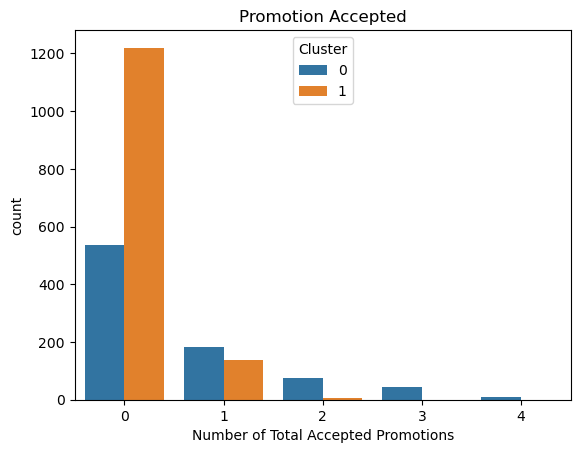

In [44]:

#Creating a feature to get a sum of accepted promotions 
cdf["Total"] = cdf["AcceptedCmp1"]+ cdf["AcceptedCmp2"]+ cdf["AcceptedCmp3"]+ cdf["AcceptedCmp4"]+ cdf["AcceptedCmp5"]

plt.figure()
pl = sns.countplot(x=cdf["Total"],hue=cdf["Cluster"])
pl.set_title("Promotion Accepted")
pl.set_xlabel("Number of Total Accepted Promotions")
plt.show()
